In [1]:
import sklearn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import random
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime
import plotly.express as px
import sklearn

from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import xgboost as xgb

import eli5 # Feature importance evaluation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

from sklearn.metrics import make_scorer
from xgboost import plot_importance

C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.
C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future ve

Nuestro dataset tiene 119390 instancias con 32 atributos.
Tenemos 79330 instancias con el City Hotel. Y tenemos 40060 instancias con el Resort Hotel.
Nuestro dataset tiene ahora 71181 instancias con 31 atributos.
Tenemos 322 instancias con atributo adults = 0
Tenemos 186 instancias con atributos stays_in_week_nights & stays_in_weekend_nights = 0
Tenemos 323 instancias con atributo adr = 0


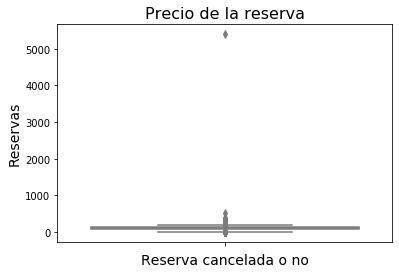

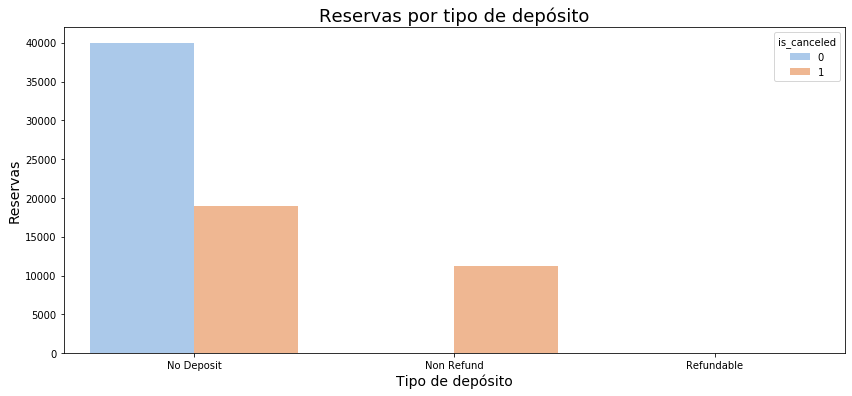

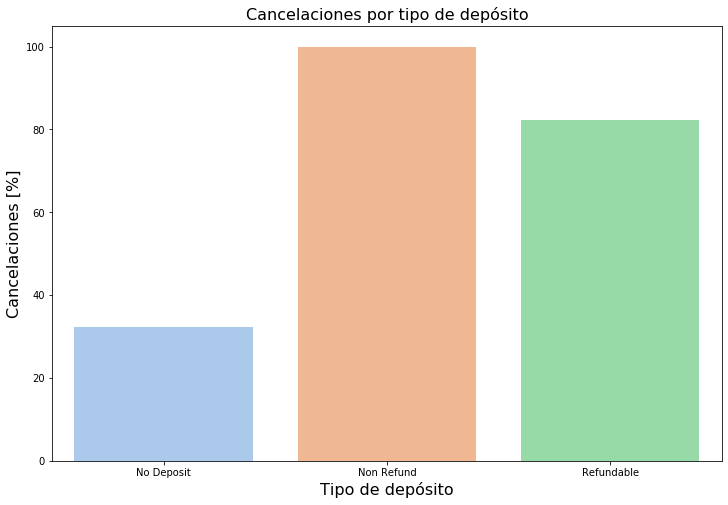

Nuestro dataset tiene 70349 instancias con 23 atributos.


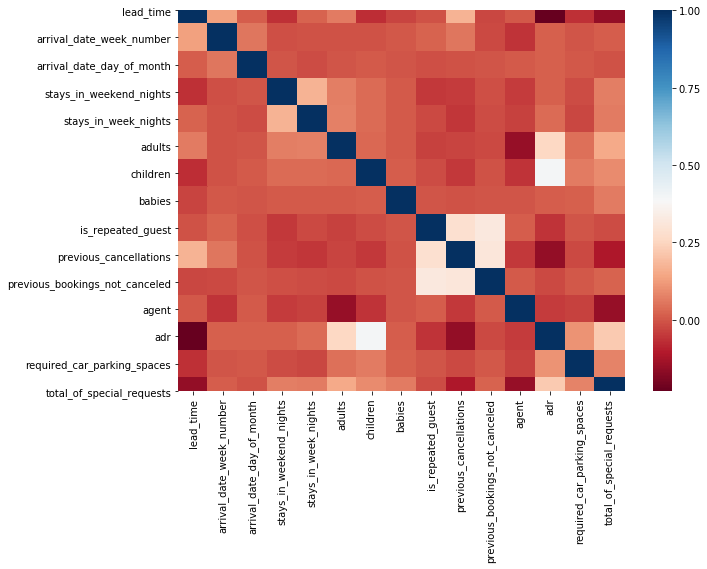

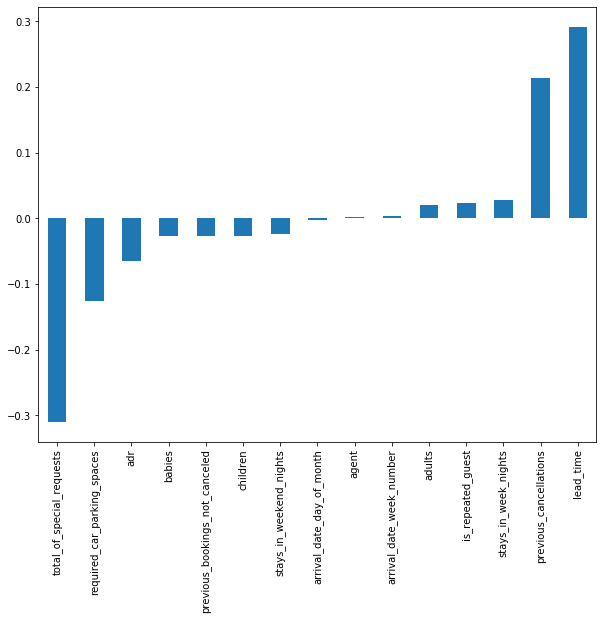

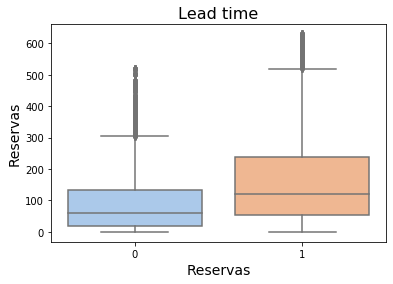

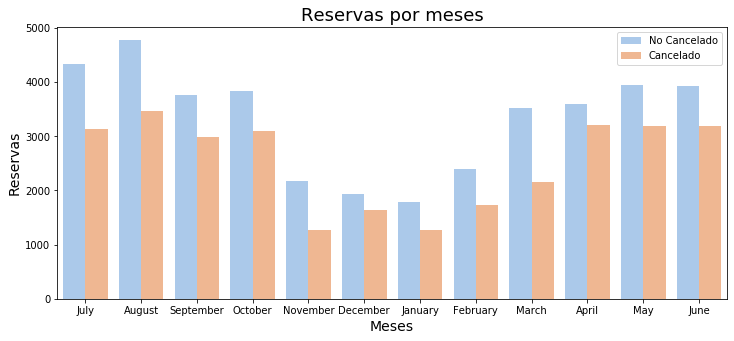

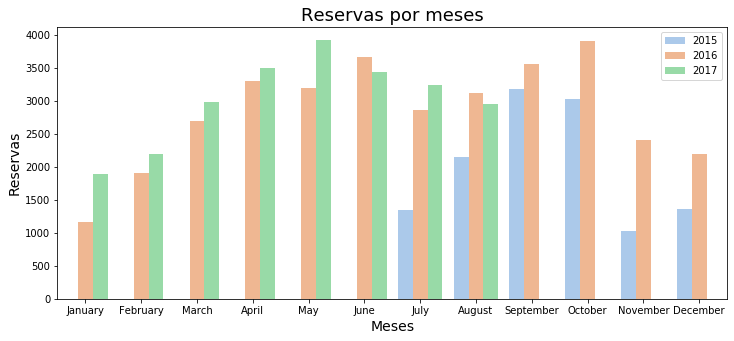

El precio medio del City Hotel es de: 59.30€ por persona y noche


No handles with labels found to put in legend.


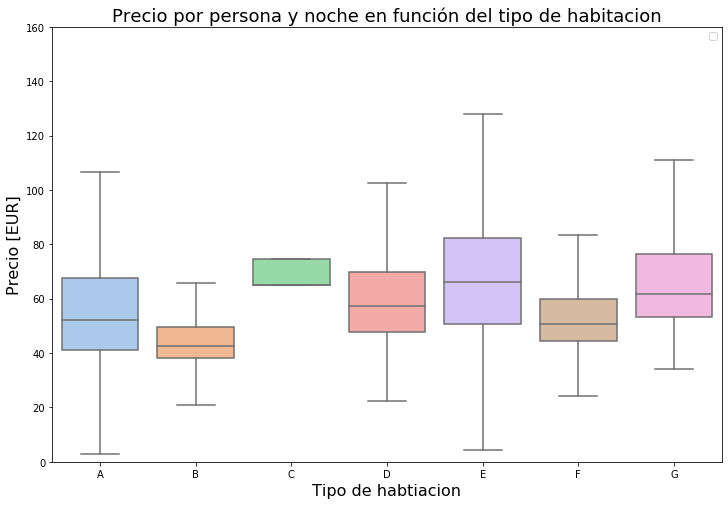

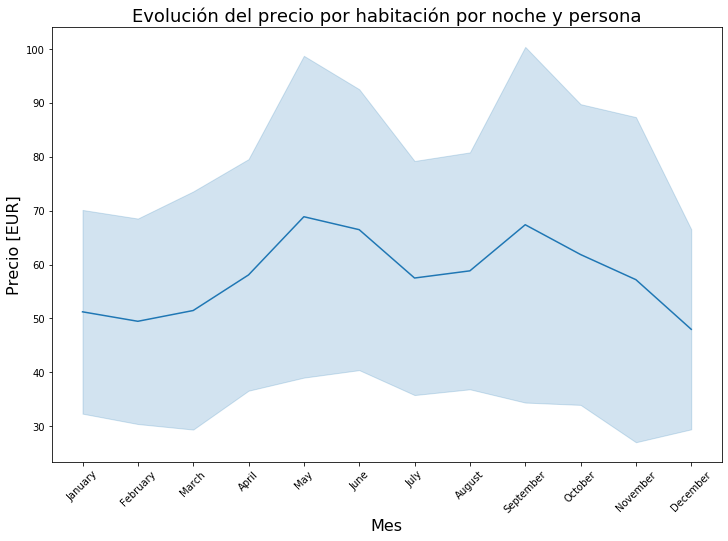

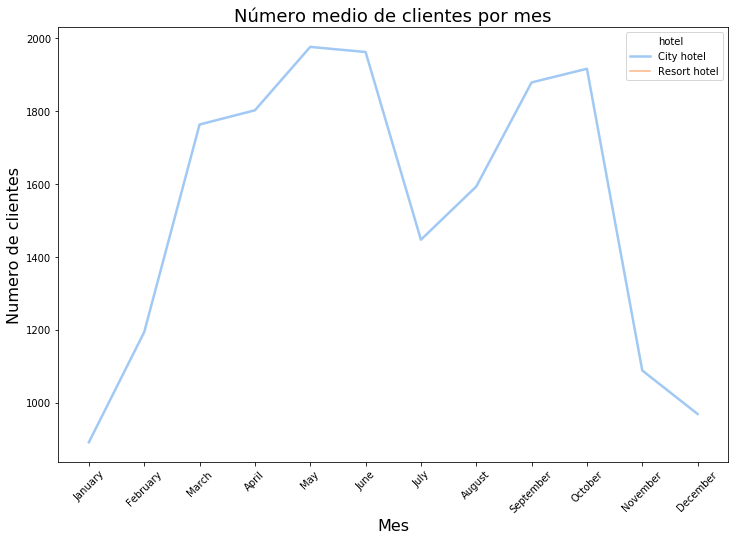

Familiarizacion_Dataset.ipynb:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



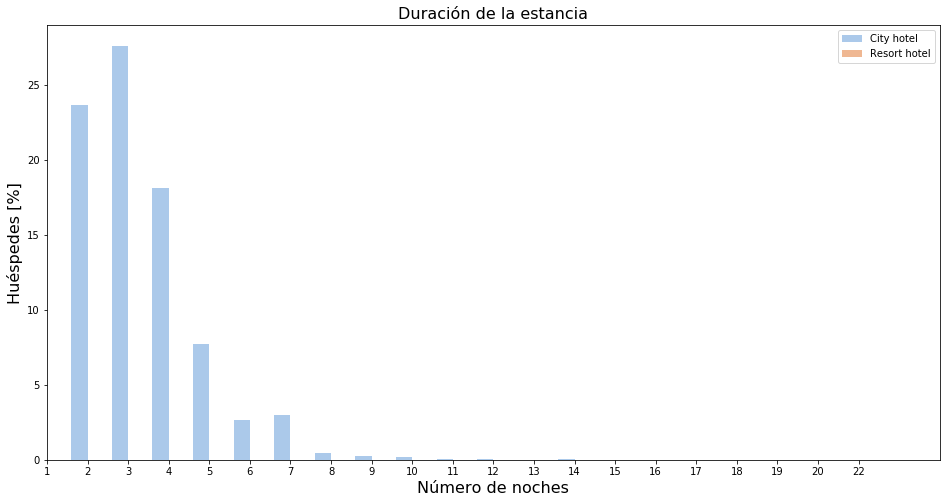

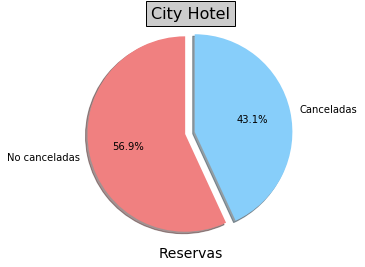

<Figure size 432x288 with 0 Axes>

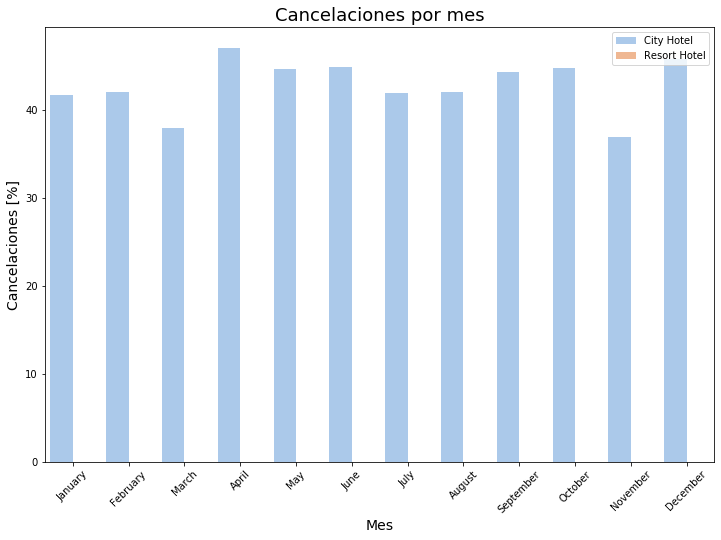

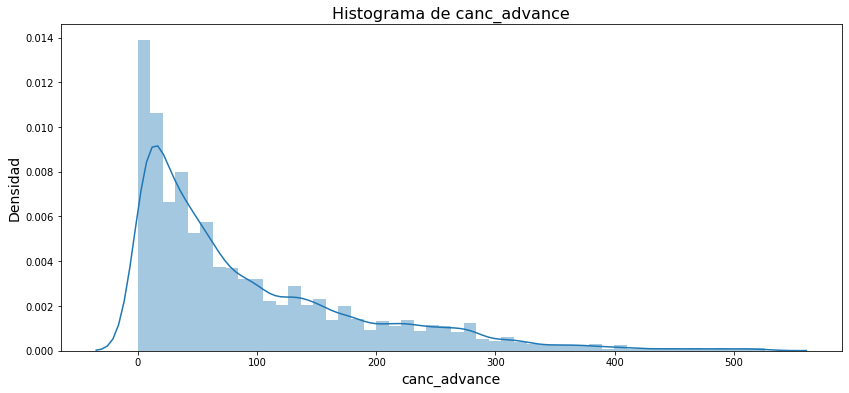

14.61 %


In [3]:
%run Familiarizacion_Dataset.ipynb

# 4. Preparamos para Machine Learning

### 4.1 Definimos dataset

In [4]:
#Mezclamos los datos para mejora la selección de muestras aleatorias.
df_clean=df_clean.sample(frac=1)

In [5]:
#Guardamos los resultados en un csv, ya que el tiempo de cálculo para obtenerlos es muy elevado
df_clean.to_csv('df_final.csv', index=False)

In [6]:
### Definimos los atributos y la variable respuesta:
X = df_clean.drop(["is_canceled"], axis=1)
Y = df_clean["is_canceled"]

### 4.2 Definimos funciones auxiliares

In [7]:
#Definimos el concepto de tn, tp, fn y fp en una matriz de confusión binaria para poder extraerlos en cada iteración del CV:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

In [8]:
#Funcion que nos muestra todos los datos importanes que hemos obtenido tras finalizar el entreno de un modelo con CV
def datos(cv_results, name):
    #Mostramos los resultados:
    accuracy_array =  cv_results['test_accuracy']
    balanced_accuracy_array =  cv_results['test_balanced_accuracy']
    roc_auc_array = cv_results['test_roc_auc']


    min_score_acc = round(min(accuracy_array), 4)
    max_score_acc = round(max(accuracy_array), 4)
    mean_score_acc = round(np.mean(accuracy_array), 4)
    std_dev_acc = round(np.std(accuracy_array), 4)

    min_score_bal_acc = round(min(balanced_accuracy_array), 4)
    max_score_bal_acc = round(max(balanced_accuracy_array), 4)
    mean_score_bal_acc = round(np.mean(balanced_accuracy_array), 4)
    std_dev_bal_acc = round(np.std(balanced_accuracy_array), 4)

    min_score_roc_auc = round(min(roc_auc_array), 4)
    max_score_roc_auc = round(max(roc_auc_array), 4)
    mean_score_roc_auc = round(np.mean(roc_auc_array), 4)
    std_dev_roc_auc = round(np.std(roc_auc_array), 4)
    
    sensitivity = np.zeros(shape=(1,10))
    specificity = np.zeros(shape=(1,10))
    precision = np.zeros(shape=(1,10))
    NPV = np.zeros(shape=(1,10))
    FNR = np.zeros(shape=(1,10))
    FPR = np.zeros(shape=(1,10))
    F1 = np.zeros(shape=(1,10))
    
    #Construimos la matriz de confusión y calculamos sus parámetros:
    cm = np.zeros(shape=(2,2))
    tp_array = cv_results['test_tp']
    tn_array = cv_results['test_tn']
    fp_array = cv_results['test_fp']
    fn_array = cv_results['test_fn']
    
    tn_mean = (tn_array.mean()).astype(np.int64)
    fp_mean = (fp_array.mean()).astype(np.int64)
    fn_mean = (fn_array.mean()).astype(np.int64)
    tp_mean = (tp_array.mean()).astype(np.int64)
    
    cm[0] = [tn_mean, fp_mean]
    cm[1] = [fn_mean, tp_mean]
    
    j=0
    while j < 10:
        sensitivity[0,j] = tp_array[j]/(tp_array[j]+fn_array[j])
        specificity[0,j] = tn_array[j]/(tn_array[j]+fp_array[j])
        precision[0,j] = tp_array[j]/(tp_array[j]+fp_array[j])
        NPV[0,j] = tn_array[j]/(tn_array[j]+fn_array[j])
        FNR[0,j] = 1-tp_array[j]/(tp_array[j]+fn_array[j])
        FPR[0,j] = 1-tn_array[j]/(tn_array[j]+fp_array[j])
        F1[0,j] = 2*tp_array[j]/(2*tp_array[j]+fp_array[j]+fn_array[j])
        j=j+1
    
        
    sd_sensitivity = round(np.std(sensitivity), 4)
    sd_specificity = round(np.std(specificity), 4)
    sd_precision = round(np.std(precision), 4)
    sd_NPV = round(np.std(NPV), 4)
    sd_FNR = round(np.std(FNR), 4)
    sd_FPR = round(np.std(FPR), 4)
    sd_F1 = round(np.std(F1), 4)
    
    sensitivity_mean = round(sensitivity.mean(),4)
    specificity_mean = round(specificity.mean(),4)
    precision_mean = round(precision.mean(),4)
    NPV_mean = round(NPV.mean(),4)
    FNR_mean = round(FNR.mean(),4)
    FPR_mean = round(FPR.mean(),4)
    F1_mean = round(F1.mean(),4)

    newrow = np.array([mean_score_acc,mean_score_bal_acc,mean_score_roc_auc,tn_mean,fp_mean,fn_mean,tp_mean])

   
    print(f"`{name} cross validation accuracy score: {mean_score_acc} +/- {std_dev_acc} (std) min: {min_score_acc}, max: {max_score_acc}")
    print(f" {name} cross validation balanced accuracy score: {mean_score_bal_acc} +/- {std_dev_bal_acc} (std) min: {min_score_bal_acc}, max: {max_score_bal_acc}")
    print(f" {name} cross validation area under ROC curve score: {mean_score_roc_auc} +/- {std_dev_roc_auc} (std) min: {min_score_roc_auc}, max: {max_score_roc_auc}")
    print(f" {name} cross validation sensitivity score: {sensitivity_mean} +/- {sd_sensitivity} (std)")
    print(f" {name} cross validation specificity score: {specificity_mean} +/- {sd_specificity} (std)")
    print(f" {name} cross validation precision score: {precision_mean} +/- {sd_precision} (std)")
    print(f" {name} cross validation NPV score: {NPV_mean} +/- {sd_NPV} (std)")
    print(f" {name} cross validation FNR score: {FNR_mean} +/- {sd_FNR} (std)")
    print(f" {name} cross validation FPR score: {FPR_mean} +/- {sd_FPR} (std)")
    print(f" cross validation F1 score: {F1_mean} +/- {sd_F1} (std)")
    print(cm)
    return(newrow)

In [9]:
#Definimos una función que nos calcule los diferentes parámetros de una matriz de confusión:
def confusion_matrix_parameters(cm):
    total=sum(sum(cm))
    cm_list = []
    
    accuracy = round ((cm[0,0]+cm[1,1])/total, 4)
    balanced_accuracy = round(((cm[1,1]/(cm[1,1]+cm[1,0]))+(cm[0,0]/(cm[0,0]+cm[0,1])))/2,4)
    sensitivity = round(cm[1,1]/(cm[1,1]+cm[1,0]),4)
    specificity = round(cm[0,0]/(cm[0,0]+cm[0,1]),4)
    precision = round(cm[1,1]/(cm[1,1]+cm[0,1]),4)
    NPV = round(cm[0,0]/(cm[0,0]+cm[1,0]),4)
    FNR = round(1-cm[1,1]/(cm[1,1]+cm[1,0]),4)
    FPR = round(1-cm[0,0]/(cm[0,0]+cm[0,1]),4)
    F1 = round(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]),4)
    
    cm_list.append(accuracy)
    cm_list.append(balanced_accuracy)
    cm_list.append(sensitivity)
    cm_list.append(specificity)
    cm_list.append(precision)
    cm_list.append(NPV)
    cm_list.append(FNR)
    cm_list.append(FPR)
    cm_list.append(F1)
    
    #print ('Accuracy: ', accuracy)
    #print ('Balanced accuracy: ', balanced_accuracy)
    #print ('Sensitivity: ', sensitivity)
    #print ('Specificity: ', specificity)
    #print ('Precision: ', precision)
    #print ('NPV: ', NPV)                                      
    #print ('FNR: ', FNR)
    #print ('FPR: ', FPR)
    #print ('F1: ', F1)
    cm_array = np.array(cm_list)
    return cm_array

In [10]:
#Definimos una función para representar la matriz de confusión. Incluiremos los parámetros que también nos calcula la función anterior
def plot_confusion_matrix(cm,title):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title, fontsize = 14)
    plt.show()
    
    total=sum(sum(cm))
    cm_list = []
    
    accuracy = round ((cm[0,0]+cm[1,1])/total, 4)
    balanced_accuracy = round(((cm[1,1]/(cm[1,1]+cm[1,0]))+(cm[0,0]/(cm[0,0]+cm[0,1])))/2,4)
    sensitivity = round(cm[1,1]/(cm[1,1]+cm[1,0]),4)
    specificity = round(cm[0,0]/(cm[0,0]+cm[0,1]),4)
    precision = round(cm[1,1]/(cm[1,1]+cm[0,1]),4)
    NPV = round(cm[0,0]/(cm[0,0]+cm[1,0]),4)
    FNR = round(1-cm[1,1]/(cm[1,1]+cm[1,0]),4)
    FPR = round(1-cm[0,0]/(cm[0,0]+cm[0,1]),4)
    F1 = round(2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]),4)
    
    cm_list.append(accuracy)
    cm_list.append(balanced_accuracy)
    cm_list.append(sensitivity)
    cm_list.append(specificity)
    cm_list.append(precision)
    cm_list.append(NPV)
    cm_list.append(FNR)
    cm_list.append(FPR)
    cm_list.append(F1)
    
    print ('Accuracy: ', accuracy)
    print ('Balanced accuracy: ', balanced_accuracy)
    print ('Sensitivity: ', sensitivity)
    print ('Specificity: ', specificity)
    print ('Precision: ', precision)
    print ('NPV: ', NPV)                                      
    print ('FNR: ', FNR)
    print ('FPR: ', FPR)
    print ('F1: ', F1)
    cm_array = np.array(cm_list)

# 5. Modelos generales

En este apartado vamos a observar como se comportan algunos algortimos con los datos que tenemos. Hemos usado Naive Bayes, Logistic regression, Decision Tree, Random Forest, Bagging, Adaboost y XGBoost.

In [11]:
models = [("Naive Bayes", GaussianNB()),("Logistic regression", LogisticRegression()),("Decision tree", DecisionTreeClassifier()),("Random Forest", RandomForestClassifier()),("Decision tree bagging",BaggingClassifier()),("AdaBoost",AdaBoostClassifier()),("XGBoost",xgb.XGBClassifier())]


In [12]:
#Codificamos las variables categóricas:
ct = make_column_transformer(
    (OneHotEncoder(),['arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','customer_type']), remainder = 'passthrough')

#Convertimos X en un array:
X = ct.fit_transform(X).toarray()

In [13]:
%%time
#Definimos como sera nuestro cross validation:
kfold = model_selection.KFold(n_splits=10)

model_results = np.zeros(shape=(7,7))
i = 0

# Preprocesamos, entrenamos los modelos, calculamos las predicciones y los resultados para cada modelo:

for name, model in models:
    #Creamos un pipeline con el preprocesado (escalar) y el modelo para asegurarnos que los datos se escalan en cada fase del CV:
    clf = make_pipeline(preprocessing.StandardScaler(), model)
    results_kfold = model_selection.cross_validate(clf, X, Y, cv=kfold, scoring={'accuracy': 'accuracy','balanced_accuracy': 'balanced_accuracy','roc_auc': 'roc_auc','tp': make_scorer(tp), 'tn': make_scorer(tn),
'fp': make_scorer(fp), 'fn': make_scorer(fn)}, n_jobs=-1)
    a=datos(results_kfold,name)
    model_results[i] = a
    i=i+1
    

`Naive Bayes cross validation accuracy score: 0.4707 +/- 0.0092 (std) min: 0.456, max: 0.487
 Naive Bayes cross validation balanced accuracy score: 0.533 +/- 0.004 (std) min: 0.5249, max: 0.5382
 Naive Bayes cross validation area under ROC curve score: 0.5349 +/- 0.0043 (std) min: 0.5261, max: 0.5412
 Naive Bayes cross validation sensitivity score: 0.9857 +/- 0.003 (std)
 Naive Bayes cross validation specificity score: 0.0803 +/- 0.0089 (std)
 Naive Bayes cross validation precision score: 0.4484 +/- 0.0079 (std)
 Naive Bayes cross validation NPV score: 0.8806 +/- 0.0206 (std)
 Naive Bayes cross validation FNR score: 0.0143 +/- 0.003 (std)
 Naive Bayes cross validation FPR score: 0.9197 +/- 0.0089 (std)
 cross validation F1 score: 0.6163 +/- 0.0071 (std)
[[ 321. 3679.]
 [  43. 2990.]]
`Logistic regression cross validation accuracy score: 0.7933 +/- 0.0046 (std) min: 0.7855, max: 0.7997
 Logistic regression cross validation balanced accuracy score: 0.7827 +/- 0.0048 (std) min: 0.7734, ma

In [14]:
#Creamos un diccionario para pasar los resultados a un dataframe:
results_dict = {'Model': ['Naive Bayes', 'Logistic regression','Decision tree','Random Forest', 'Decision tree bagging','AdaBoost','XGBoost']
                 , 'Accuracy': model_results[:,0],'Balanced accuracy': model_results[:,1],'ROC AUC': model_results[:,2],'TN': model_results[:,3],'FP': model_results[:,4],'FN': model_results[:,5],'TP': model_results[:,6]}

model_results_df = pd.DataFrame.from_dict(results_dict)
model_results_df

,Model,Accuracy,Balanced accuracy,ROC AUC,TN,FP,FN,TP
0,Naive Bayes,0.4707,0.5330,0.5349,321.0,3679.0,43.0,2990.0
1,Logistic regression,0.7933,0.7827,0.8704,3439.0,561.0,892.0,2141.0
2,Decision tree,0.8477,0.8450,0.8481,3458.0,542.0,529.0,2504.0
3,Random Forest,0.8799,0.8733,0.9535,3684.0,316.0,528.0,2505.0
4,Decision tree bagging,0.8707,0.8645,0.9423,3639.0,361.0,548.0,2485.0
5,AdaBoost,0.8088,0.7996,0.8931,3468.0,532.0,812.0,2221.0
6,XGBoost,0.8598,0.8537,0.9414,3594.0,406.0,579.0,2454.0


Text(0.5, 1.0, 'Area under ROC curve VS method')

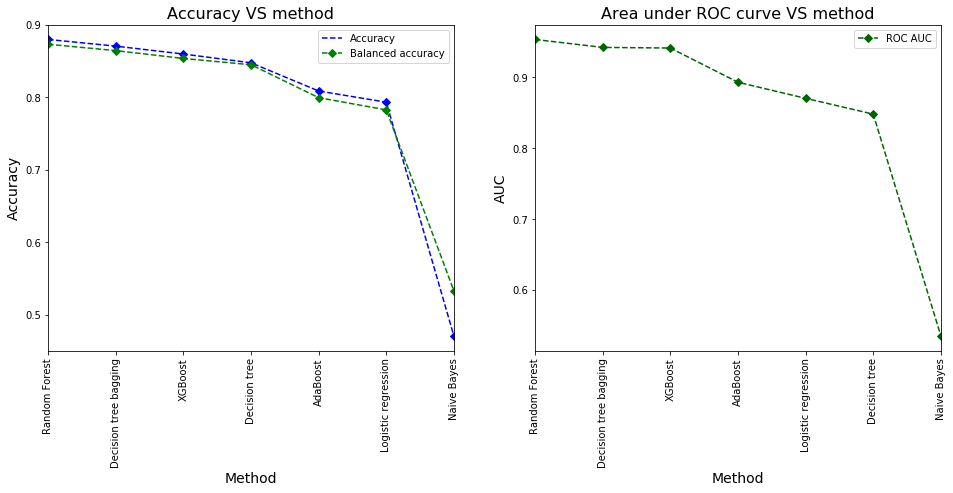

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,6))
a = model_results_df.sort_values(by = 'Balanced accuracy', ascending=False).plot(kind='line',x='Model',y='Accuracy',ax=ax1, rot = 90, color = 'blue',linestyle ='--', marker='D')
model_results_df.sort_values(by = 'Balanced accuracy', ascending=False).plot(kind='line',x='Model',y='Balanced accuracy', color='green', ax=ax1, rot = 90,linestyle ='--', marker='D')
a.set_title('Accuracy VS method', fontsize = 16)
a.set_xlabel('Method', fontsize = 14)
a.set_ylabel('Accuracy', fontsize = 14)

b = model_results_df.sort_values(by = 'ROC AUC', ascending=False).plot(kind='line',x='Model',y='ROC AUC', rot = 90, color = 'DarkGreen',linestyle ='--', marker='D',ax=ax2)
b.set_xlabel('Method', fontsize = 14)
b.set_ylabel('AUC', fontsize = 14)
plt.title('Area under ROC curve VS method', fontsize = 16)

Vemos que el Random Forest parece ser el algoritmo que se comporta mejor. En los siguiente apartados realizaremos un estudio de los hiperparametros para mejorar si cabe cada uno de los algoritmos.

In [16]:
#Construimos un array con los datos:
model_results_cm_array = model_results[:,3:7]

#Inicializamos las matrices de confusión de cada modelo:
cm_NaiveBayes = np.zeros(shape=(2,2))
cm_LR = np.zeros(shape=(2,2))
cm_DT = np.zeros(shape=(2,2))
cm_RF = np.zeros(shape=(2,2))
cm_DTB = np.zeros(shape=(2,2))
cm_AB = np.zeros(shape=(2,2))
cm_XGB = np.zeros(shape=(2,2))

#Les asignamos los valores correspondientes:
cm_NaiveBayes[0]=model_results_cm_array[0,0:2]
cm_NaiveBayes[1]=model_results_cm_array[0,2:4]
cm_LR[0]=model_results_cm_array[1,0:2]
cm_LR[1]=model_results_cm_array[1,2:4]
cm_DT[0]=model_results_cm_array[2,0:2]
cm_DT[1]=model_results_cm_array[2,2:4]
cm_RF[0]=model_results_cm_array[3,0:2]
cm_RF[1]=model_results_cm_array[3,2:4]
cm_DTB[0]=model_results_cm_array[4,0:2]
cm_DTB[1]=model_results_cm_array[4,2:4]
cm_AB[0]=model_results_cm_array[5,0:2]
cm_AB[1]=model_results_cm_array[5,2:4]
cm_XGB[0]=model_results_cm_array[6,0:2]
cm_XGB[1]=model_results_cm_array[6,2:4]

#Usamos la función que hemos definido al inicio para calcular los parámetros de cada matriz de confusión
NaiveBayes_parameters = confusion_matrix_parameters(cm_NaiveBayes)
LR_parameters = confusion_matrix_parameters(cm_LR)

DT_parameters = confusion_matrix_parameters(cm_DT)
RF_parameters = confusion_matrix_parameters(cm_RF)
DTB_parameters = confusion_matrix_parameters(cm_DTB)
AB_parameters = confusion_matrix_parameters(cm_AB)
XGB_parameters = confusion_matrix_parameters(cm_XGB)

#Guardamos los resultados en un nuevo array:
model_cm_parameters = np.zeros(shape=(7,9))
model_cm_parameters[0] = NaiveBayes_parameters
model_cm_parameters[1] = LR_parameters

model_cm_parameters[2] = DT_parameters
model_cm_parameters[3] = RF_parameters
model_cm_parameters[4] = DTB_parameters
model_cm_parameters[5] = AB_parameters
model_cm_parameters[6] = XGB_parameters

In [17]:
#Creamos de nuevo un diccionario para guardar los datos en un dataframe:
cm_results_dict = {'Model': ['Naive Bayes', 'Logistic regression','Decision tree','Random Forest', 'Decision tree bagging','AdaBoost','XGBoost']
                 , 'Accuracy': model_cm_parameters[:,0],'Balanced accuracy': model_cm_parameters[:,1],'Sensitivity': model_cm_parameters[:,2],'Specificity': model_cm_parameters[:,3],'Precision': model_cm_parameters[:,4],'NPV': model_cm_parameters[:,5],'FNR': model_cm_parameters[:,6],'FPR': model_cm_parameters[:,7],'F1': model_cm_parameters[:,8]}

cm_results_df = pd.DataFrame.from_dict(cm_results_dict)
cm_results_df

,Model,Accuracy,Balanced accuracy,Sensitivity,Specificity,Precision,NPV,FNR,FPR,F1
0,Naive Bayes,0.4708,0.5330,0.9858,0.0802,0.4483,0.8819,0.0142,0.9198,0.6164
1,Logistic regression,0.7934,0.7828,0.7059,0.8598,0.7924,0.7940,0.2941,0.1402,0.7466
2,Decision tree,0.8477,0.8450,0.8256,0.8645,0.8221,0.8673,0.1744,0.1355,0.8238
3,Random Forest,0.8800,0.8735,0.8259,0.9210,0.8880,0.8746,0.1741,0.0790,0.8558
4,Decision tree bagging,0.8708,0.8645,0.8193,0.9098,0.8732,0.8691,0.1807,0.0903,0.8454
5,AdaBoost,0.8089,0.7996,0.7323,0.8670,0.8068,0.8103,0.2677,0.1330,0.7677
6,XGBoost,0.8599,0.8538,0.8091,0.8985,0.8580,0.8613,0.1909,0.1015,0.8329


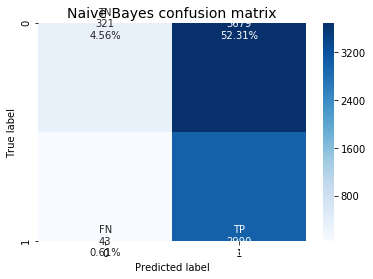

Accuracy:  0.4708
Balanced accuracy:  0.533
Sensitivity:  0.9858
Specificity:  0.0802
Precision:  0.4483
NPV:  0.8819
FNR:  0.0142
FPR:  0.9198
F1:  0.6164


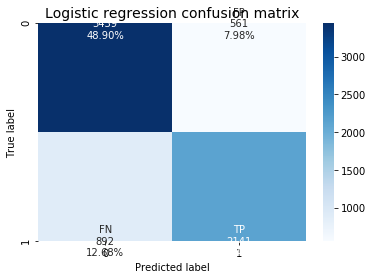

Accuracy:  0.7934
Balanced accuracy:  0.7828
Sensitivity:  0.7059
Specificity:  0.8598
Precision:  0.7924
NPV:  0.794
FNR:  0.2941
FPR:  0.1402
F1:  0.7466


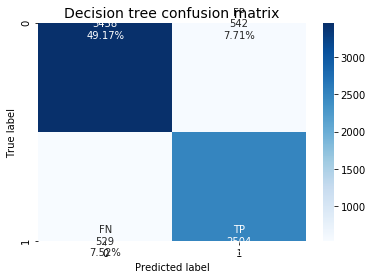

Accuracy:  0.8477
Balanced accuracy:  0.845
Sensitivity:  0.8256
Specificity:  0.8645
Precision:  0.8221
NPV:  0.8673
FNR:  0.1744
FPR:  0.1355
F1:  0.8238


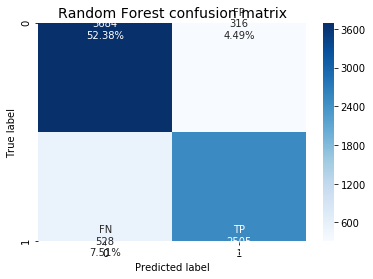

Accuracy:  0.88
Balanced accuracy:  0.8735
Sensitivity:  0.8259
Specificity:  0.921
Precision:  0.888
NPV:  0.8746
FNR:  0.1741
FPR:  0.079
F1:  0.8558


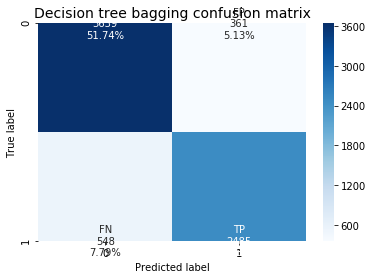

Accuracy:  0.8708
Balanced accuracy:  0.8645
Sensitivity:  0.8193
Specificity:  0.9098
Precision:  0.8732
NPV:  0.8691
FNR:  0.1807
FPR:  0.0903
F1:  0.8454


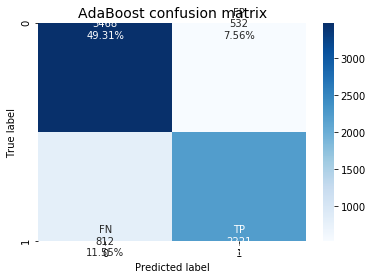

Accuracy:  0.8089
Balanced accuracy:  0.7996
Sensitivity:  0.7323
Specificity:  0.867
Precision:  0.8068
NPV:  0.8103
FNR:  0.2677
FPR:  0.133
F1:  0.7677


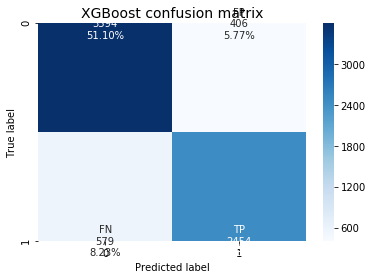

Accuracy:  0.8599
Balanced accuracy:  0.8538
Sensitivity:  0.8091
Specificity:  0.8985
Precision:  0.858
NPV:  0.8613
FNR:  0.1909
FPR:  0.1015
F1:  0.8329


In [18]:
%matplotlib inline
#Mostramos todas las matrices de confusión y sus parámetros con la función que hemos creado:
plot_confusion_matrix(cm_NaiveBayes,'Naive Bayes confusion matrix')
plot_confusion_matrix(cm_LR,'Logistic regression confusion matrix')
plot_confusion_matrix(cm_DT,'Decision tree confusion matrix')
plot_confusion_matrix(cm_RF,'Random Forest confusion matrix')
plot_confusion_matrix(cm_DTB,'Decision tree bagging confusion matrix')
plot_confusion_matrix(cm_AB,'AdaBoost confusion matrix')
plot_confusion_matrix(cm_XGB,'XGBoost confusion matrix')